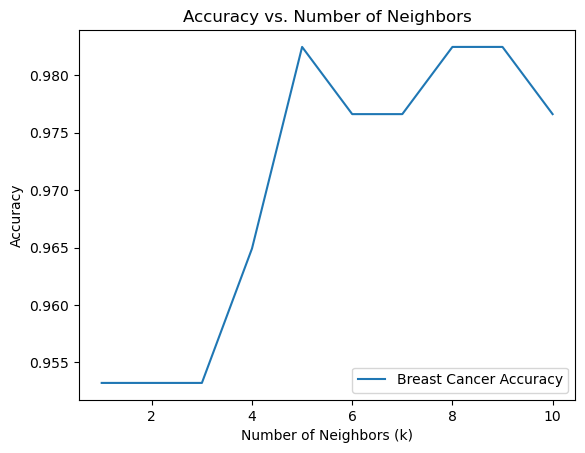

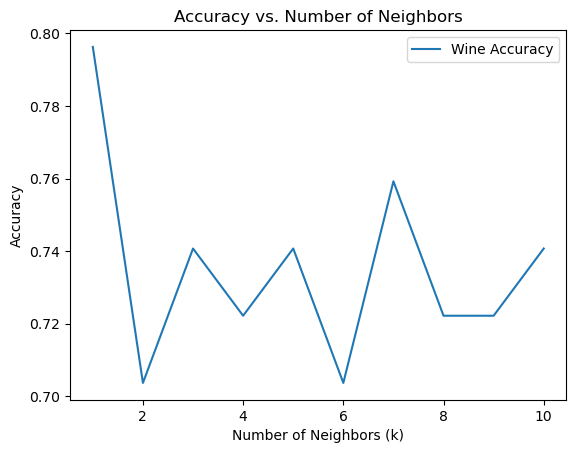

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load datasets
cancer_df = pd.read_csv('Breast_Cancer.csv')
wine_df = pd.read_csv('wine.data.csv')

cancer_df = cancer_df.apply(LabelEncoder().fit_transform)

# Prepare Breast Cancer (binary classification)
X_cancer = cancer_df.drop(['id','diagnosis'],axis=1) # Features
y_cancer = cancer_df['diagnosis'].values # Target

# Prepare Wine Dataset (multiclass classification)
X_wine = wine_df.drop('Class',axis=1)    # Features
y_wine = wine_df['Class'].values       # Target

# Split the data for both datasets
X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(X_cancer, y_cancer, test_size=0.3, random_state=42)
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(X_wine, y_wine, test_size=0.3, random_state=42)

# Test different k values for both datasets
k_values = range(1, 11)
cancer_accuracies = []
wine_accuracies = []

for k in k_values:
    knn_cancer = KNeighborsClassifier(n_neighbors=k)
    knn_cancer.fit(X_train_cancer, y_train_cancer)
    y_pred_cancer = knn_cancer.predict(X_test_cancer)
    cancer_accuracies.append(accuracy_score(y_test_cancer, y_pred_cancer))
    
    knn_wine = KNeighborsClassifier(n_neighbors=k)
    knn_wine.fit(X_train_wine, y_train_wine)
    y_pred_wine = knn_wine.predict(X_test_wine)
    wine_accuracies.append(accuracy_score(y_test_wine, y_pred_wine))

# Plot results
plt.plot(k_values, cancer_accuracies, label='Breast Cancer Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Neighbors')
plt.legend()
plt.show()


plt.plot(k_values, wine_accuracies, label='Wine Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Neighbors')
plt.legend()
plt.show()